In [163]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/car-price-prediction-challenge")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\zhavr\.cache\kagglehub\datasets\deepcontractor\car-price-prediction-challenge\versions\1


In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [165]:
df = pd.read_csv("car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Удаление незначимых данных

In [166]:
df.drop(columns=["Doors", "Wheel","Color", "ID", "Airbags"], inplace=True)

In [167]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
dtype: object

Замена значений, подразумевающих числа, на числовой тип

In [168]:
df["Levy"] = pd.to_numeric(df["Levy"], errors='coerce')
df["Mileage"] = df["Mileage"].str.replace(" km", "").astype(float)
df["Engine volume"] = pd.to_numeric(df["Engine volume"], errors='coerce')

In [169]:
df.replace("-", np.nan, inplace=True)

In [170]:
df.isnull().sum()

Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume       1931
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
dtype: int64

Обработка пропущенных значений

In [171]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [172]:
df.shape

(19237, 13)

In [173]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(3541, 13)

In [174]:
df= df.drop_duplicates()

In [175]:
df.count()

Price               15696
Levy                15696
Manufacturer        15696
Model               15696
Prod. year          15696
Category            15696
Leather interior    15696
Fuel type           15696
Engine volume       15696
Mileage             15696
Cylinders           15696
Gear box type       15696
Drive wheels        15696
dtype: int64

Замена строковых значений на числовой

In [176]:
from sklearn.preprocessing import LabelEncoder

In [177]:
label_encoders = {}
for column in ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels"]:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Проверяем что они имеют числовой тип

In [178]:
df.dtypes

Price                 int64
Levy                float64
Manufacturer          int32
Model                 int32
Prod. year            int64
Category              int32
Leather interior      int32
Fuel type             int32
Engine volume       float64
Mileage             float64
Cylinders           float64
Gear box type         int32
Drive wheels          int32
dtype: object

In [179]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
0,13328,1399.0,32,1242,2010,4,1,2,3.5,186005.0,6.0,0,0
1,16621,1018.0,8,658,2011,4,0,5,3.0,192000.0,6.0,2,0
2,8467,781.0,21,684,2006,3,0,5,1.3,200000.0,4.0,3,1
3,3607,862.0,16,661,2011,4,1,2,2.5,168966.0,4.0,0,0
4,11726,446.0,21,684,2014,3,1,5,1.3,91901.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645.0,58,1154,2011,3,1,2,1.8,307325.0,4.0,0,1
19232,8467,781.0,36,385,1999,1,1,0,2.0,300000.0,4.0,1,2
19233,15681,831.0,23,1334,2011,9,1,5,2.4,161600.0,4.0,2,1
19234,26108,836.0,23,1442,2010,4,1,1,2.0,116365.0,4.0,0,1


Обработка выбросов

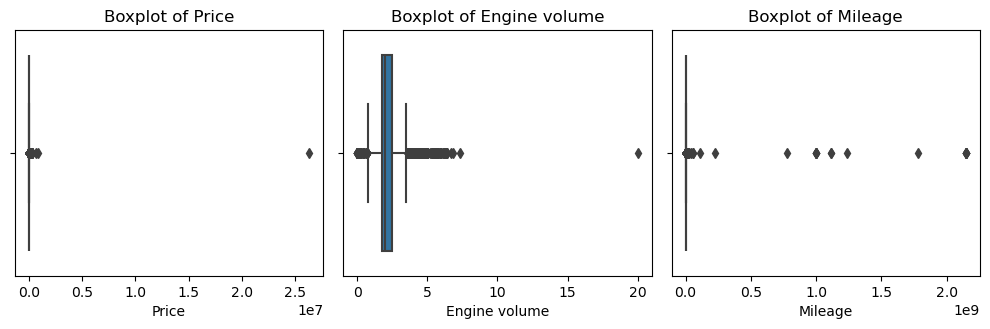

In [180]:
plt.figure(figsize=(10, 6))

num_columns = ['Price', 'Engine volume', 'Mileage']

for i, column in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [184]:
data_numeric=df[['Price', 'Engine volume', 'Mileage']]
for col in data_numeric:
    q1=data_numeric[col].quantile(0.25)
    q3=data_numeric[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outlier=((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    total=data_numeric[col].shape[0]
    print (f'Total outlier in {col} are:{outlier}--({round(100*(outlier)/total,2)}%)')
    if outlier>0:
        df=df.loc[(df[col]<=high) & (df[col]>=low)]

Total outlier in Price are:72--(0.58%)
Total outlier in Engine volume are:0--(0.0%)
Total outlier in Mileage are:0--(0.0%)


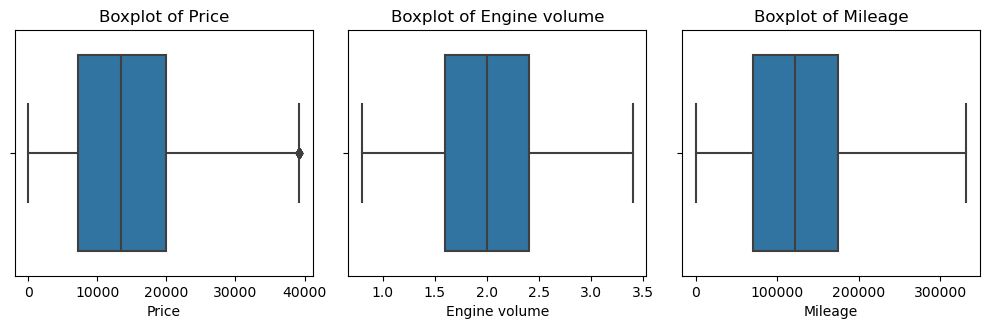

In [185]:
plt.figure(figsize=(10, 6))

num_columns = ['Price', 'Engine volume', 'Mileage']

for i, column in enumerate(num_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [186]:
col = 'Price'

q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3 - q1

low = q1 - 1.5 * iqr
high = q3 + 1.5 * iqr

outlier = ((df[col] > high) | (df[col] < low)).sum()
total = df[col].shape[0]

print(f'Total outliers in {col}: {outlier} ({round(100 * outlier / total, 2)}%)')

if outlier > 0:
    df = df.loc[(df[col] <= high) & (df[col] >= low)]

Total outliers in Price: 45 (0.36%)


Нормализация числовых данных

In [187]:
num_columns = ["Price","Levy", "Engine volume", "Mileage"]
for column in num_columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [113]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
1,0.431005,0.105776,8,658,2011,4,0,5,0.846154,0.577890,6.0,2,0
2,0.219548,0.073261,21,684,2006,3,0,5,0.192308,0.601969,4.0,3,1
3,0.093514,0.084374,16,661,2011,4,1,2,0.653846,0.508562,4.0,0,0
4,0.304064,0.027301,21,684,2014,3,1,5,0.192308,0.276608,4.0,0,1
6,0.046731,0.070517,58,1154,2010,3,1,2,0.384615,0.779276,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,0.012163,0.054603,58,1154,2011,3,1,2,0.384615,0.925001,4.0,0,1
19232,0.219548,0.073261,36,385,1999,1,1,0,0.461538,0.902954,4.0,1,2
19233,0.406628,0.080121,23,1334,2011,9,1,5,0.615385,0.486391,4.0,2,1
19234,0.677031,0.080807,23,1442,2010,4,1,1,0.461538,0.350241,4.0,0,1


Обновление индексов

In [188]:
df.reset_index(drop=True, inplace=True)

In [189]:
corr= df.select_dtypes(exclude=object).corr()

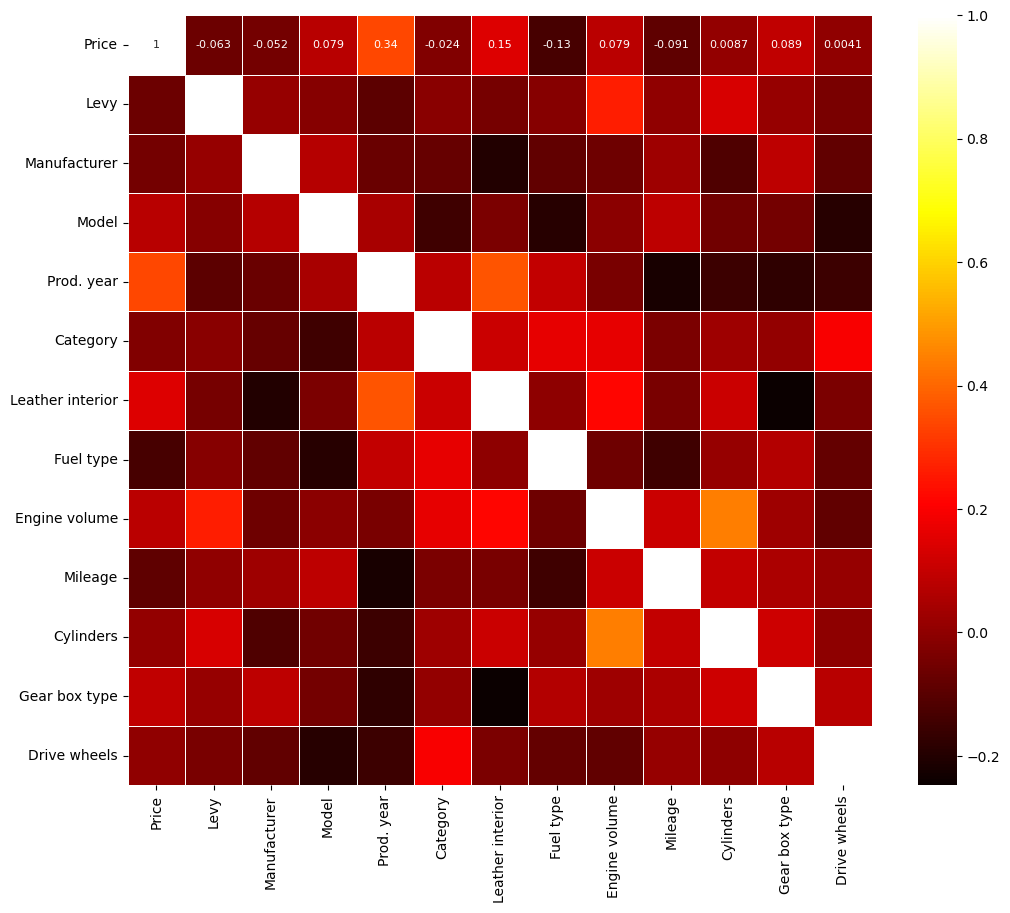

In [190]:
plt.figure(figsize=(12, 10))  

sns.heatmap(corr, annot=True, linewidths=0.5, cmap='hot', annot_kws={"size": 8})

plt.show()

In [191]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
0,0.424109,0.105776,8,658,2011,4,0,5,0.846154,0.577890,6.0,2,0
1,0.216036,0.073261,21,684,2006,3,0,5,0.192308,0.601969,4.0,3,1
2,0.092018,0.084374,16,661,2011,4,1,2,0.653846,0.508562,4.0,0,0
3,0.299199,0.027301,21,684,2014,3,1,5,0.192308,0.276608,4.0,0,1
4,0.045983,0.070517,58,1154,2010,3,1,2,0.384615,0.779276,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,0.011968,0.054603,58,1154,2011,3,1,2,0.384615,0.925001,4.0,0,1
12336,0.216036,0.073261,36,385,1999,1,1,0,0.461538,0.902954,4.0,1,2
12337,0.400122,0.080121,23,1334,2011,9,1,5,0.615385,0.486391,4.0,2,1
12338,0.666199,0.080807,23,1442,2010,4,1,1,0.461538,0.350241,4.0,0,1


In [192]:
df.to_excel(
 'Набор данных.xlsx',
 sheet_name='df',
 index=False,
)

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_squared_error

In [195]:
X = df[["Levy", "Engine volume", "Mileage"]]
y = df["Price"]

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
models_metrics = []

In [201]:
def models(model, x_train, x_test, y_train, y_test, transform=None):
    y_pred = None
    
    if transform == "log_y":
        y_train_trans = np.log1p(y_train)  
        y_test_trans = np.log1p(y_test)   
        model.fit(x_train, y_train_trans)
        y_pred = model.predict(x_test)
        y_pred = np.expm1(y_pred) 
    elif transform == "log_x":
        x_train_trans = np.log1p(x_train)
        x_test_trans = np.log1p(x_test)
        model.fit(x_train_trans, y_train)
        y_pred = model.predict(x_test_trans)
    elif transform == "log_x_log_y":
        x_train_trans = np.log1p(x_train)
        x_test_trans = np.log1p(x_test)
        y_train_trans = np.log1p(y_train)
        y_test_trans = np.log1p(y_test)
        model.fit(x_train_trans, y_train_trans)
        y_pred = model.predict(x_test_trans)
        y_pred = np.expm1(y_pred)  
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    if y_pred is None:
        raise ValueError("y_pred не был определён. Проверьте входные данные и трансформации.")

    R2_Score = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    MAE = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    Max_Error = max_error(y_test, y_pred)     # Max Error

    models_metrics.append({
        "Model": type(model).__name__ + (f" ({transform})" if transform else ""),
        "R2": R2_Score,
        "RMSE": RMSE,
        "MAE": MAE,
        "Max Error": Max_Error,
    })
    
    # Вывод метрик
    print(f"Model: {type(model).__name__} ({transform if transform else 'default'}), R2 = {R2_Score}, RMSE = {RMSE}, MAE = {MAE}, Max Error = {Max_Error}")


In [202]:
# Линейная регрессия
lin_reg = LinearRegression()
models(lin_reg, X_train, X_test, y_train, y_test)

Model: LinearRegression (default), R2 = 0.01562977692512324, RMSE = 0.23917584389074062, MAE = 0.19143090784650932, Max Error = 0.7012289797288414


In [211]:
# Логарифмическая регрессия (ln y)
models(lin_reg, X_train, X_test, y_train, y_test, transform="log_x")

Model: LinearRegression (log_x), R2 = 0.015725953946423177, RMSE = 0.23916415937327057, MAE = 0.19119950846404923, Max Error = 0.6970089438753773


In [204]:
# Полиномиальная регрессия (второй степени)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
models(poly_model, X_train_poly, X_test_poly, y_train, y_test)

Model: LinearRegression (default), R2 = 0.07048005766389975, RMSE = 0.232416756926012, MAE = 0.1843505070494071, Max Error = 0.7119459904073836


In [205]:
# Степенная регрессия (ln x и ln y)
models(lin_reg, X_train, X_test, y_train, y_test, transform="log_x_log_y")

# Экспоненциальная регрессия (x и ln y)
models(lin_reg, X_train, X_test, y_train, y_test, transform="log_y")

Model: LinearRegression (log_x_log_y), R2 = 0.0008329344973287967, RMSE = 0.2409667588688611, MAE = 0.19179570960732092, Max Error = 0.7113628114158248
Model: LinearRegression (log_y), R2 = 0.0009765149919197524, RMSE = 0.24094944476262123, MAE = 0.19191673010564056, Max Error = 0.7149290825325325


In [206]:
# Гиперболическая регрессия (1/x и y)
X_train_hyp = 1 / (X_train + 1e-6)  # Чтобы избежать деления на 0
X_test_hyp = 1 / (X_test + 1e-6)
models(lin_reg, X_train_hyp, X_test_hyp, y_train, y_test)

Model: LinearRegression (default), R2 = 0.018793294888220458, RMSE = 0.23879120915180443, MAE = 0.192131781502714, Max Error = 0.7668061240606322


In [207]:
# Выводим результаты
results_df = pd.DataFrame(models_metrics)
print("\nМодели и их метрики:")
print(results_df)


Модели и их метрики:
                            Model        R2      RMSE       MAE  Max Error
0                LinearRegression  0.015630  0.239176  0.191431   0.701229
1        LinearRegression (log_y)  0.000977  0.240949  0.191917   0.714929
2                LinearRegression  0.070480  0.232417  0.184351   0.711946
3  LinearRegression (log_x_log_y)  0.000833  0.240967  0.191796   0.711363
4        LinearRegression (log_y)  0.000977  0.240949  0.191917   0.714929
5                LinearRegression  0.018793  0.238791  0.192132   0.766806


In [208]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred = poly_model.predict(X_poly)

In [209]:
intercept = poly_model.intercept_
coefficients = poly_model.coef_

In [210]:
feature_names = poly.get_feature_names_out(X_train.columns)  

equation = f"y = {intercept:.4f} "
for coef, name in zip(coefficients, feature_names):
    equation += f"+ ({coef:.4f}) * {name} "

print("Уравнение полиномиальной регрессии:")
print(equation)

Уравнение полиномиальной регрессии:
y = 0.1375 + (0.0000) * 1 + (-0.8463) * Levy + (1.0604) * Engine volume + (0.2167) * Mileage + (0.3624) * Levy^2 + (0.0812) * Levy Engine volume + (0.5554) * Levy Mileage + (-0.9850) * Engine volume^2 + (0.2624) * Engine volume Mileage + (-0.5868) * Mileage^2 


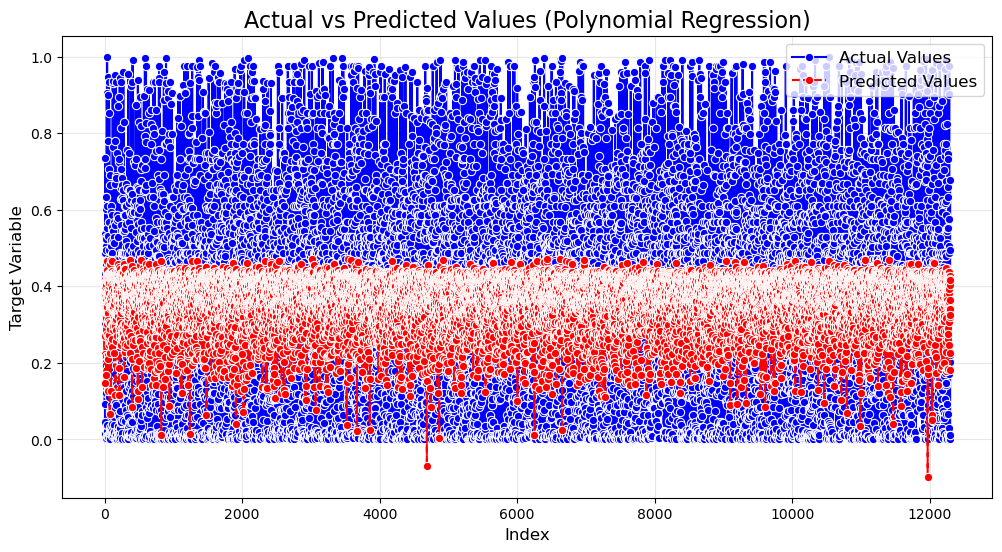

In [150]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(len(y)), y=y, label='Actual Values', color='blue', marker='o', linestyle='-')
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted Values', color='red', marker='o', linestyle='--')
plt.title("Actual vs Predicted Values (Polynomial Regression)", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Target Variable", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


In [37]:
x=df.drop(['Price','Color','Cylinders','Drive wheels'],axis=1)
y=df['Price']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [146]:
R2=[]
MSE=[]
Algorithms = [
    "PolynomialRegression",
    "RandomForestRegressor",
    "GradientBoostingRegressor",
    "DecisionTreeRegressor",
    "KNeighborsRegressor",
    "XGBRegressor",
]

In [158]:
models_metrics = []

def models(model, is_poly=False, degrees=2):
    if is_poly:
        poly = PolynomialFeatures(degree=degrees)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        model.fit(x_train_poly, y_train)
        y_pred = model.predict(x_test_poly)
    else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

    # Оцениваем метрики
    R2_Score = r2_score(y_test, y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Сохраняем результаты в список
    models_metrics.append({
        'Model': type(model).__name__,
        'R2': R2_Score,
        'RMSE': RMSE
    })
    
    # Печать результатов
    print(f"Model: {type(model).__name__}, R2 = {R2_Score}, RMSE = {RMSE}")
    
    return y_pred  # Возвращаем предсказания

In [159]:
model1= make_pipeline(PolynomialFeatures(2), LinearRegression())
model2= RandomForestRegressor(random_state=42)
model3= GradientBoostingRegressor(random_state=42)
model4= DecisionTreeRegressor(random_state=42)
model5= KNeighborsRegressor()
model6= XGBRegressor(random_state=42)

In [160]:
models(model1)

Model: Pipeline, R2 = 0.5019647278148954, RMSE = 0.167739944625799


array([0.1902191 , 0.42680559, 0.35621611, ..., 0.46451561, 0.09473069,
       0.44297061])

In [161]:
linear_regressor = model1.named_steps['linearregression']  
coefficients = linear_regressor.coef_
intercept = linear_regressor.intercept_
print("Уравнение полиномиальной регрессии:")
equation = "y = {:.2f}".format(intercept)
for i, coef in enumerate(coefficients[1:], 1): 
    equation += " + ({:.2f}) * x{}".format(coef, i)

print(equation)

Уравнение полиномиальной регрессии:
y = 2458.62 + (-21.29) * x1 + (-0.14) * x2 + (0.00) * x3 + (-2.48) * x4 + (0.55) * x5 + (-3.53) * x6 + (3.96) * x7 + (-26.73) * x8 + (19.25) * x9 + (-4.98) * x10 + (1.64) * x11 + (-0.39) * x12 + (0.00) * x13 + (0.00) * x14 + (0.01) * x15 + (0.02) * x16 + (-0.09) * x17 + (-0.02) * x18 + (-0.23) * x19 + (-0.01) * x20 + (0.06) * x21 + (-0.01) * x22 + (-0.00) * x23 + (-0.00) * x24 + (0.00) * x25 + (0.00) * x26 + (-0.00) * x27 + (-0.00) * x28 + (0.00) * x29 + (-0.00) * x30 + (-0.00) * x31 + (-0.00) * x32 + (0.00) * x33 + (-0.00) * x34 + (-0.00) * x35 + (-0.00) * x36 + (-0.00) * x37 + (-0.00) * x38 + (0.00) * x39 + (-0.00) * x40 + (0.00) * x41 + (0.00) * x42 + (-0.00) * x43 + (0.00) * x44 + (-0.00) * x45 + (0.01) * x46 + (-0.01) * x47 + (0.00) * x48 + (-0.00) * x49 + (-0.00) * x50 + (-0.01) * x51 + (0.00) * x52 + (-0.02) * x53 + (0.01) * x54 + (0.00) * x55 + (-0.00) * x56 + (-3.53) * x57 + (-0.01) * x58 + (-0.11) * x59 + (0.03) * x60 + (0.05) * x61 + (-0.0

In [162]:
models(model2)

Model: RandomForestRegressor, R2 = 0.7474660132967919, RMSE = 0.11944455640501579


array([0.21137405, 0.73801361, 0.26309547, ..., 0.40284411, 0.13922375,
       0.35323236])

In [163]:
models(model3)

Model: GradientBoostingRegressor, R2 = 0.6493036804450769, RMSE = 0.14075766328322833


array([0.20941007, 0.5002335 , 0.4019372 , ..., 0.47749038, 0.09442083,
       0.44379056])

In [164]:
models(model4)

Model: DecisionTreeRegressor, R2 = 0.5542506525341109, RMSE = 0.15869081934775714


array([0.12310191, 0.95988553, 0.35352806, ..., 0.31307845, 0.04627601,
       0.36969244])

In [165]:
models(model5)

Model: KNeighborsRegressor, R2 = 0.5886285284133912, RMSE = 0.15244863130342254


array([0.21409162, 0.78997138, 0.25487638, ..., 0.40202119, 0.13521875,
       0.3842378 ])

In [166]:
models_df = pd.DataFrame(models_metrics)

print(models_df)

                       Model        R2      RMSE
0                   Pipeline  0.501965  0.167740
1      RandomForestRegressor  0.747466  0.119445
2  GradientBoostingRegressor  0.649304  0.140758
3      DecisionTreeRegressor  0.554251  0.158691
4        KNeighborsRegressor  0.588629  0.152449


In [167]:
y_pred_model2 = models(model2, is_poly=False)

Model: RandomForestRegressor, R2 = 0.7474660132967919, RMSE = 0.11944455640501579


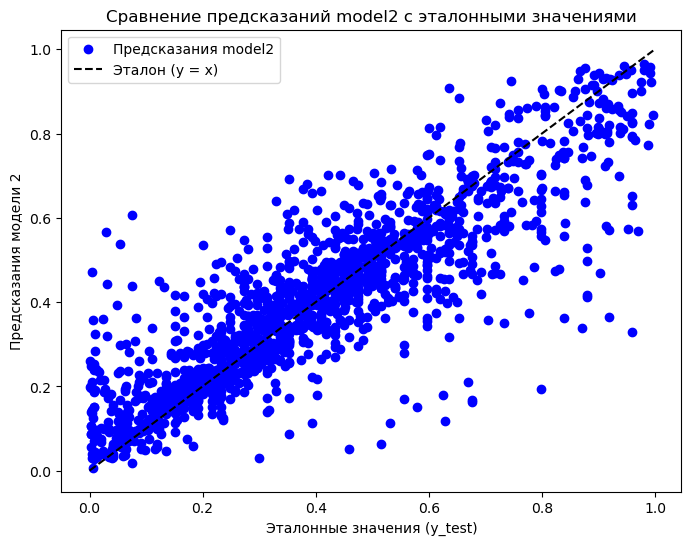

In [168]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_model2, color='blue', label='Предсказания model2')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Эталон (y = x)")
plt.xlabel("Эталонные значения (y_test)")
plt.ylabel("Предсказания модели 2")
plt.title("Сравнение предсказаний model2 с эталонными значениями")
plt.legend()
plt.show()

In [157]:
x_data = df['Mileage']
y_data = df['Price']

In [158]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels
0,0.431005,0.105776,8,658,2011,4,0,5,0.846154,0.577890,6.0,2,0
1,0.219548,0.073261,21,684,2006,3,0,5,0.192308,0.601969,4.0,3,1
2,0.093514,0.084374,16,661,2011,4,1,2,0.653846,0.508562,4.0,0,0
3,0.304064,0.027301,21,684,2014,3,1,5,0.192308,0.276608,4.0,0,1
4,0.046731,0.070517,58,1154,2010,3,1,2,0.384615,0.779276,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12293,0.012163,0.054603,58,1154,2011,3,1,2,0.384615,0.925001,4.0,0,1
12294,0.219548,0.073261,36,385,1999,1,1,0,0.461538,0.902954,4.0,1,2
12295,0.406628,0.080121,23,1334,2011,9,1,5,0.615385,0.486391,4.0,2,1
12296,0.677031,0.080807,23,1442,2010,4,1,1,0.461538,0.350241,4.0,0,1


In [159]:
def exponential_model(x, a, b):
    return a * np.exp(b * x)

In [160]:
from scipy.optimize import curve_fit
params, covariance = curve_fit(exponential_model, x_data, y_data, p0=[1, 0.0001])

In [161]:
a, b = params
print(f"Найденные коэффициенты: a = {a}, b = {b}")

Найденные коэффициенты: a = 0.3947604733652778, b = -0.2272967046320043


In [233]:
X = df[['Levy','Mileage','Engine volume']]
y = df['Price']

In [234]:
X = X.to_numpy()
y = y.to_numpy()

# Добавим единичный столбец для смещения
X = np.c_[np.ones(X.shape[0]), X]

In [235]:
def gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = X.shape[1]  
    theta = np.zeros(m)  
    m_samples = len(y)
    
    # Градиентный спуск
    for epoch in range(epochs):
        predictions = X.dot(theta) 
        error = predictions - y
        gradient = (1/m_samples) * X.T.dot(error)
        theta -= learning_rate * gradient  

    return theta


theta = gradient_descent(X, y, learning_rate=0.01, epochs=1000)

y_pred = X.dot(theta)

In [238]:
RMSE = np.sqrt(np.mean((y - y_pred) ** 2))
MAE = np.mean(np.abs(y - y_pred))
MAPE = np.mean(np.abs((y - y_pred) / y)) * 100

print(f"RMSE: {RMSE}")
print(f"MAE: {MAE}")

RMSE: 0.23241110375682678
MAE: 0.18762398488932377
